In [52]:
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [53]:
import torchvision.datasets as datasets

emnist_train = datasets.EMNIST(root='./data', split='letters', train=True, download=True)
emnist_test = datasets.EMNIST(root='./data', split='letters', train=False, download=True)


In [66]:
# Define una transformación para convertir las imágenes en tensores y normalizarlos
#transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Carga el conjunto de datos EMNIST (puedes elegir la división deseada, por ejemplo, 'letters' o 'digits')
# emnist_train = datasets.EMNIST(root='./data', split='letters', train=True, transform=transform, download=True)
# emnist_test = datasets.EMNIST(root='./data', split='letters', train=False, transform=transform, download=True)

emnist_train = datasets.EMNIST(root='./data', split='letters', train=True, download=True)
emnist_test = datasets.EMNIST(root='./data', split='letters', train=False, download=True)

# Obtiene los datos y las etiquetas del conjunto de entrenamiento
X = emnist_train.data
Y = emnist_train.targets


X.shape, Y.shape

(torch.Size([124800, 28, 28]), torch.Size([124800]))

In [67]:
# Define una función para mapear los valores numéricos de las etiquetas a tipos de letra legibles
def map_labels_to_letters(label_values):
    letters = "abcdefghijklmnopqrstuvwxyz"  # Letras minúsculas del alfabeto inglés
    return [letters[val-1] if val > 0 else 'special' for val in label_values]


In [68]:
# Mapea los valores numéricos de las etiquetas a tipos de letra legibles
Y_letters = map_labels_to_letters(Y)

In [69]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

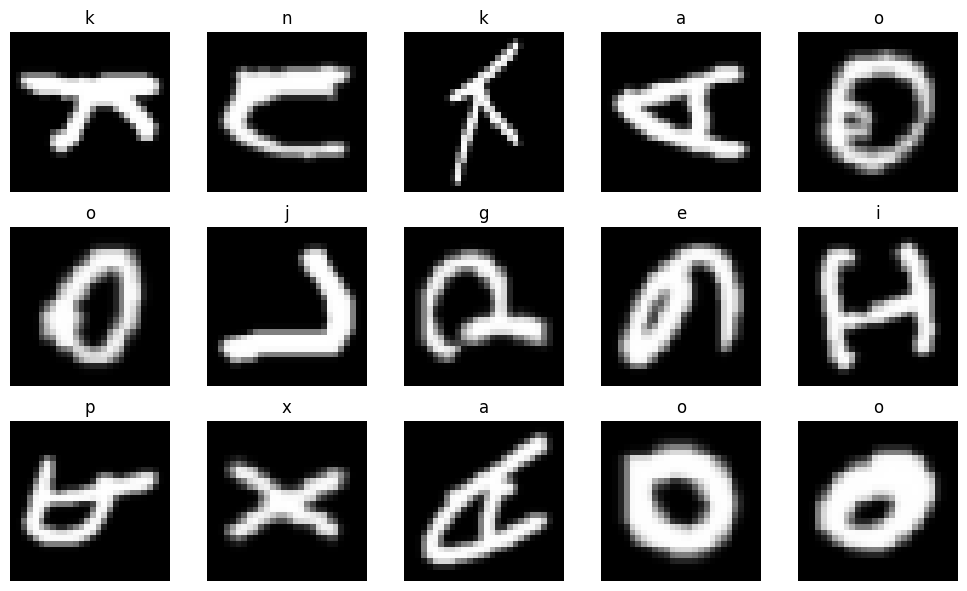

In [58]:
# Grafica algunos ejemplos
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X)-1)
        img = X[ix]
        label = Y_letters[ix]
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.axis("off")
        plt.title(label)
plt.tight_layout()
plt.show()

In [76]:
#X_train, X_test, y_train, y_test = emnist_train.data, emnist_test.data, emnist_train.targets, emnist_test.targets

# normalizamos los datos

X_train = emnist_train.data / 255.
X_test =  emnist_test.data / 255.
y_train =  emnist_train.targets.astype(np.int)
y_test =  emnist_test.targets.astype(np.int)

AttributeError: ignored

In [60]:
import torch

In [28]:
# función de pérdida y derivada

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def cross_entropy(output, target):
    logits = output[torch.arange(len(output)), target]
    loss = - logits + torch.log(torch.sum(torch.exp(output), axis=-1))
    loss = loss.mean()
    return loss

In [30]:
# X_train = X.numpy()
# y_train = Y.numpy()

In [65]:
D_in, H, D_out = 784,100, 27

# pesos del MLP (copiamos en gpu)
w1 = torch.tensor(np.random.normal(loc=0.0,
          scale = np.sqrt(2/(D_in+H)),
          size = (D_in, H)), requires_grad=True, device="cuda", dtype=torch.float)
b1 = torch.zeros(H, requires_grad=True, device="cuda", dtype=torch.float) #es el bias

w2 = torch.tensor(np.random.normal(loc=0.0,
          scale = np.sqrt(2/(D_out+H)),
          size = (H, D_out)), requires_grad=True, device="cuda", dtype=torch.float)
b2 = torch.zeros(D_out, requires_grad=True, device="cuda", dtype=torch.float)

# convertimos datos a tensores y copiamos en gpu
# X_t = torch.from_numpy(X_train).float().cuda()
# Y_t = torch.from_numpy(y_train).long().cuda()

X_t = (X_train).float().cuda()
Y_t = (y_train).long().cuda()

epochs = 100
lr = 0.01
log_each = 10
l = []

# print("Shape of X_t:", X_t.shape)
# print("Shape of w1:", w1.shape)

for e in range(1, epochs+1):

    # Aplana el tensor X_t para que tenga la forma (n_samples, n_features)
    X_flat = X_t.view(-1, D_in)

    # forward calcula la "y" predicha
    h = X_flat.mm(w1) + b1
    h_relu = h.clamp(min=0) # relu
    y_pred = h_relu.mm(w2) + b2

    # loss
    loss = cross_entropy(y_pred, Y_t)
    l.append(loss.item())

    # Backprop (calculamos todos los gradientes automáticamente)
    loss.backward()

    with torch.no_grad():
        # update pesos
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

        # ponemos a cero los gradientes para la siguiente iteración
        # (sino acumularíamos gradientes)
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()

    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")

Epoch 10/100 Loss nan
Epoch 20/100 Loss nan
Epoch 30/100 Loss nan
Epoch 40/100 Loss nan
Epoch 50/100 Loss nan
Epoch 60/100 Loss nan
Epoch 70/100 Loss nan
Epoch 80/100 Loss nan
Epoch 90/100 Loss nan
Epoch 100/100 Loss nan
